# Acquire Data and Observe   

https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [2]:
import numpy as np
import pandas as pd

In [4]:
train_df = pd.read_csv('./input/train.csv')
test_df  = pd.read_csv('./input/test.csv')
combine = [train_df, test_df]

In [7]:
# Variables in data
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## What features contain blank, null, or empty value?  
- Cabin (obvious from train data's head / tail)
- Age (obvious in train data's tail)
- Embarked (a couple of NA in train data)
- Fare (one missing in test data)  

In [33]:
print('# Total Size  ', train_df.shape)

num_columns = train_df.columns.size
for col_name in train_df.columns:
    col = train_df[col_name]
    print(col_name, '=', col.dropna().size)

# Total Size   (891, 12)
PassengerId = 891
Survived = 891
Pclass = 891
Name = 891
Sex = 891
Age = 714
SibSp = 891
Parch = 891
Ticket = 891
Fare = 891
Cabin = 204
Embarked = 889


In [36]:
print('# of Total Size ', test_df.shape)

num_columns = test_df.columns.size
for col_name in test_df.columns:
    col = test_df[col_name]
    print(col_name, '=', col.dropna().size)

# of Total Size  (418, 11)
PassengerId = 418
Pclass = 418
Name = 418
Sex = 418
Age = 332
SibSp = 418
Parch = 418
Ticket = 418
Fare = 417
Cabin = 91
Embarked = 418


In [168]:
# For sure, test data contains one NaN in Fare feature.  Verify it. 
valid_index = test_df['Fare'].dropna().index
absent_index = test_df.index.difference(valid_index)
print('Absent Fare at ', absent_index, 'as', test_df.loc[absent_index,'Fare'])

Absent Fare at  Int64Index([152], dtype='int64') as 152   NaN
Name: Fare, dtype: float64


In [169]:
# Fare in 152th row is NaN 
test_df.loc[151:153,'Fare']

151     7.8958
152        NaN
153    12.1833
Name: Fare, dtype: float64

## Data Types of Features  

int64  
- PassengerId  
- Survived  
- Pclass  
- SlbSp  
- Parch  

float64  
- Age  
- Fare  

object(string)  
- Name 
- Sex  [male/female]
- Ticket  
- Cabin  
- Embarked  [S/Q/C/NAN]

In [52]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [62]:
# Test Data does not have "Survived" feature (i.e., no answer)
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [172]:
print( 'Sex variation = ', train_df['Sex'].unique() )
#print( train_df['Ticket'].unique())
#print( train_df['Cabin'].unique())
print( 'Cabin Variation = ', train_df['Cabin'].unique().size)
print( 'Embarked Variation = ', train_df['Embarked'].unique().size)
print( train_df['Embarked'].unique())

Sex variation =  ['male' 'female']
Cabin Variation =  148
Embarked Variation =  4
['S' 'C' 'Q' nan]


In [95]:
train_total = train_df.shape[0]
train_survived = train_df['Survived'].where(train_df['Survived']==1).count()

print('Train Data # rows = ', train_total)
print('Survived person   = ', train_survived)
print('Survived percentage=', train_survived/train_total*100)


Train Data # rows =  891
Survived person   =  342
Survived percentage= 38.38383838383838


In [103]:
train_no_sibsp = train_df['SibSp'].where(train_df['SibSp']==0).count()
print('SibSp= 0 => ', train_no_sibsp, ' : ', train_no_sibsp / train_total * 100, '%')
train_no_parch = train_df['Parch'].where(train_df['Parch']==0).count()
print('Parch= 0 => ', train_no_parch, ' : ', train_no_parch / train_total * 100, '%')

SibSp= 0 =>  608  :  68.23793490460157 %
Parch= 0 =>  678  :  76.0942760942761 %


In [105]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**There are some "very high fare"**

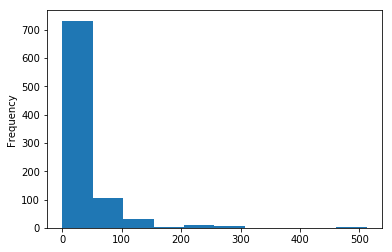

In [111]:
train_df['Fare'].plot.hist()

In [107]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

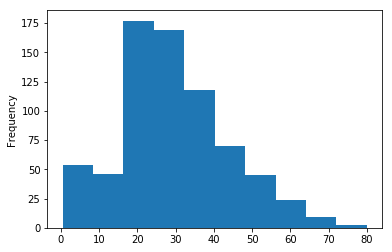

In [112]:
train_df['Age'].plot.hist()

In [114]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andersson, Master. Sigvard Harald Elias",male,1601,B96 B98,S
freq,1,577,7,4,644


In [124]:
print('Male (top of sex) = ', 577/891 * 100, '%')
print('Ticket duplicated most  = ', (891-681)/891 * 100, '%')

Male (top of sex) =  64.75869809203144 %
Ticket duplicated most  =  23.56902356902357 %


---  
## Pivoting Features  

- Pclass (Passenger Class) appears correlated with survival rate  
- Sex certainly has correlation with survival rate 
- SibSp & Parch has little correlation, e.g., higher numbers show small survival rate (may need to create new feature!)


In [145]:
# Pclass correlation to survivied, as mean value
# Looks like higher class (smaller Pclass value) has better survive rate. 
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [147]:
# Sex correlation to survived, as mean value 
# Looks like female has higher rate of survival, as expected (lady first!)
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [150]:
# SibSp correlation to survived, as mean value 
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [152]:
# Parch correlation to survived, as mean value 
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


--- 
# Visualiation 

## Correlating Numerical Features

In [155]:
import seaborn as sns 
import matplotlib.pyplot as plt 

- ** Age has some correlation, but some have NaN.  Need to complete Age feature**
- ** Babies (Age <= 4?) had high survival rate** 
- ** Oldest one (Age = 80) survived** 
- ** Most passengers are 15-35 age range **

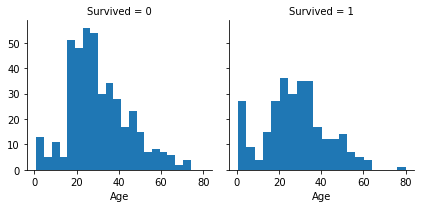

In [158]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- **Pclass=3 had most passengers, but many did not survive **   
- **PClass=1 had high probability of survival compared to the others**
- **Babies in PClass=2 were mostly survived**
- **PClass and Age has some correlation, e.g., elders in PClass=1, youngers in PClass=3**

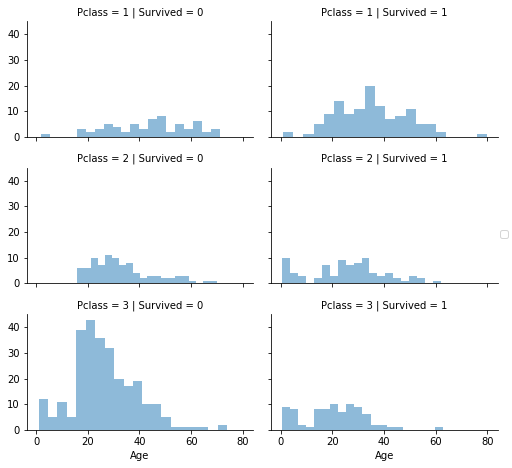

In [162]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend()

## Correlating Categorical features

- ** Embarked = C had male survival rate higher than female.  Embarked = S & Q both had female higher **  


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


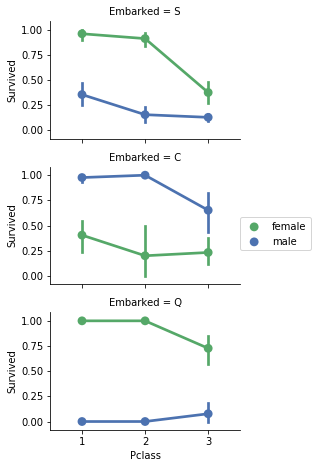

In [165]:
g = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

## Correlating Categorical and Numerial Features  

- ** Embarked=Q had low Fare passengers (and male's survival rate was quite low) ** 
- ** Embarked=C had higher survival rate compared to other ports **  
- ** Survivers tended to pay higher Fares compared to non-surviver ** 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


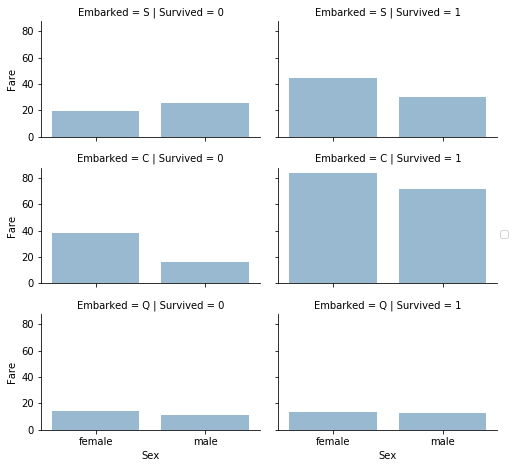

In [167]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
g.add_legend()